In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_hospital = pd.read_csv("data_new/h_admissions/df_b_horizonte_day.csv")
df_hospital.rename(columns={"DT_INTER": 'Date'}, inplace=True)


In [3]:
df_hospital['Date'] = pd.to_datetime(df_hospital['Date'], format='%Y%m%d')
df_hospital.head()

,Date,NUMBER_INT
0,2012-01-01,27
1,2012-01-02,41
2,2012-01-03,53
3,2012-01-04,64
4,2012-01-05,64


In [4]:
df_days = pd.read_csv("data_new/new_datasets/days_weather.csv") 
df_days['Date'] = pd.to_datetime(df_days['Date'])
df_days.head()


,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min
0,2015-01-01,Thu,3,0,33.9,20.6,89.0,32.0
1,2015-01-02,Fri,4,0,32.9,21.0,87.0,38.0
2,2015-01-03,Sat,5,1,33.5,20.2,83.0,38.0
3,2015-01-04,Sun,6,1,30.6,22.2,81.0,43.0
4,2015-01-05,Mon,0,0,30.8,20.8,79.0,36.0


In [5]:
df_day_hospital = pd.merge(df_days, df_hospital, on='Date', how='left')

In [6]:
df_day_hospital.head()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT
0,2015-01-01,Thu,3,0,33.9,20.6,89.0,32.0,30
1,2015-01-02,Fri,4,0,32.9,21.0,87.0,38.0,43
2,2015-01-03,Sat,5,1,33.5,20.2,83.0,38.0,23
3,2015-01-04,Sun,6,1,30.6,22.2,81.0,43.0,20
4,2015-01-05,Mon,0,0,30.8,20.8,79.0,36.0,51


In [7]:
df_day_hospital.tail()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT
1821,2019-12-27,Fri,4,0,29.1,19.9,83.0,40.0,48
1822,2019-12-28,Sat,5,1,28.6,19.7,88.0,44.0,39
1823,2019-12-29,Sun,6,1,29.4,18.8,90.0,40.0,36
1824,2019-12-30,Mon,0,0,29.3,18.1,84.0,32.0,41
1825,2019-12-31,Tue,1,0,29.9,18.8,79.0,37.0,49


In [8]:
df_centro = pd.read_csv("data_new/air_quality/b_horizonte_pivot_centro.csv")
df_centro.head()

,Data,CO,MP10,O3,MP2.5,SO2
0,01/01/2015,NaN,12.0,54.0,NaN,8.0
1,01/01/2016,0.0,17.0,42.0,NaN,0.0
2,01/01/2018,NaN,26.0,29.0,10.0,0.0
3,01/01/2019,0.0,16.0,34.0,4.0,0.0
4,01/01/2020,0.0,11.0,40.0,NaN,2.0


In [9]:
# df_centro['Data'] = pd.to_datetime(df_centro['Data'], format='%d/%m/%Y').dt.strftime('%Y%m%d').astype(int)
df_centro['Data'] = pd.to_datetime(df_centro['Data'], format='%d/%m/%Y')

df_centro.head(20)

,Data,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,NaN,12.0,54.0,NaN,8.0
1,2016-01-01,0.0,17.0,42.0,NaN,0.0
2,2018-01-01,NaN,26.0,29.0,10.0,0.0
3,2019-01-01,0.0,16.0,34.0,4.0,0.0
4,2020-01-01,0.0,11.0,40.0,NaN,2.0
5,2021-01-01,0.0,6.0,55.0,NaN,8.0
6,2022-01-01,0.0,NaN,22.0,11.0,0.0
7,2015-02-01,0.0,14.0,54.0,NaN,2.0
8,2016-02-01,0.0,10.0,38.0,4.0,2.0
9,2017-02-01,0.0,11.0,36.0,7.0,2.0


In [10]:
df_centro.rename(columns={'Data': 'Date', 'CO': 'EST2_CO', 'MP10': 'EST2_MP10', 'O3': 'EST2_03', 'MP2.5': 'EST2_MP2.5', 'SO2': 'EST2_SO2'}, inplace=True)

In [11]:
df_day_hospital_centro = pd.merge(df_day_hospital, df_centro, on='Date', how='left')


In [12]:
df_day_hospital_centro.head()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT,EST2_CO,EST2_MP10,EST2_03,EST2_MP2.5,EST2_SO2
0,2015-01-01,Thu,3,0,33.9,20.6,89.0,32.0,30,NaN,12.0,54.0,NaN,8.0
1,2015-01-02,Fri,4,0,32.9,21.0,87.0,38.0,43,NaN,13.0,68.0,NaN,10.0
2,2015-01-03,Sat,5,1,33.5,20.2,83.0,38.0,23,0.0,17.0,62.0,NaN,14.0
3,2015-01-04,Sun,6,1,30.6,22.2,81.0,43.0,20,0.0,17.0,68.0,NaN,14.0
4,2015-01-05,Mon,0,0,30.8,20.8,79.0,36.0,51,0.0,12.0,46.0,NaN,0.0


In [13]:
df_day_hospital_centro.tail()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT,EST2_CO,EST2_MP10,EST2_03,EST2_MP2.5,EST2_SO2
1821,2019-12-27,Fri,4,0,29.1,19.9,83.0,40.0,48,0.0,14.0,38.0,NaN,2.0
1822,2019-12-28,Sat,5,1,28.6,19.7,88.0,44.0,39,0.0,10.0,38.0,NaN,2.0
1823,2019-12-29,Sun,6,1,29.4,18.8,90.0,40.0,36,0.0,10.0,34.0,NaN,0.0
1824,2019-12-30,Mon,0,0,29.3,18.1,84.0,32.0,41,0.0,8.0,42.0,NaN,0.0
1825,2019-12-31,Tue,1,0,29.9,18.8,79.0,37.0,49,0.0,10.0,37.0,NaN,2.0


In [ ]:
#export final dataset
# df_day_hospital_centro.to_csv('df_final_bh_centro.csv', index=False)

In [15]:
df_day_hospital_centro.dtypes

Date            datetime64[ns]
DayOfWeek               object
DayOfWeekNum             int64
IsWeekend                int64
temp_max               float64
temp_min               float64
humidity_max           float64
humidity_min           float64
NUMBER_INT               int64
EST2_CO                float64
EST2_MP10              float64
EST2_03                float64
EST2_MP2.5             float64
EST2_SO2               float64
dtype: object

In [16]:
df_day_hospital_centro.count()

Date            1826
DayOfWeek       1826
DayOfWeekNum    1826
IsWeekend       1826
temp_max        1826
temp_min        1826
humidity_max    1826
humidity_min    1826
NUMBER_INT      1826
EST2_CO         1543
EST2_MP10       1757
EST2_03         1659
EST2_MP2.5      1183
EST2_SO2        1703
dtype: int64

In [17]:
df_day_hospital_centro.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1826,2017-07-01 12:00:00,2015-01-01 00:00:00,2016-04-01 06:00:00,2017-07-01 12:00:00,2018-09-30 18:00:00,2019-12-31 00:00:00,NaN
DayOfWeekNum,1826.0,3.000548,0.0,1.0,3.0,5.0,6.0,2.000959
IsWeekend,1826.0,0.285871,0.0,0.0,0.0,1.0,1.0,0.451952
temp_max,1826.0,28.314513,17.8,26.3,28.5,30.475,37.7,3.044044
temp_min,1826.0,17.791347,7.3,16.1,18.4,19.7,24.1,2.625865
humidity_max,1826.0,82.264513,42.0,77.0,84.0,90.0,94.0,9.226503
humidity_min,1826.0,40.261227,10.0,32.0,39.0,48.0,91.0,12.64652
NUMBER_INT,1826.0,47.780394,11.0,37.0,47.0,59.0,94.0,15.631632
EST2_CO,1543.0,0.18989,0.0,0.0,0.0,0.0,3.0,0.414837
EST2_MP10,1757.0,20.038702,2.0,12.0,18.0,25.0,116.0,12.090334


In [18]:
# Statistics
df_day_hospital_centro.describe()

,Date,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT,EST2_CO,EST2_MP10,EST2_03,EST2_MP2.5,EST2_SO2
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1543.000000,1757.000000,1659.000000,1183.000000,1703.000000
mean,2017-07-01 12:00:00,3.000548,0.285871,28.314513,17.791347,82.264513,40.261227,47.780394,0.189890,20.038702,40.426160,11.580727,2.204345
min,2015-01-01 00:00:00,0.000000,0.000000,17.800000,7.300000,42.000000,10.000000,11.000000,0.000000,2.000000,2.000000,2.000000,0.000000
25%,2016-04-01 06:00:00,1.000000,0.000000,26.300000,16.100000,77.000000,32.000000,37.000000,0.000000,12.000000,30.000000,6.000000,0.000000
50%,2017-07-01 12:00:00,3.000000,0.000000,28.500000,18.400000,84.000000,39.000000,47.000000,0.000000,18.000000,39.000000,8.000000,2.000000
75%,2018-09-30 18:00:00,5.000000,1.000000,30.475000,19.700000,90.000000,48.000000,59.000000,0.000000,25.000000,50.000000,11.000000,2.000000
max,2019-12-31 00:00:00,6.000000,1.000000,37.700000,24.100000,94.000000,91.000000,94.000000,3.000000,116.000000,94.000000,77.000000,60.000000
std,NaN,2.000959,0.451952,3.044044,2.625865,9.226503,12.646520,15.631632,0.414837,12.090334,13.599158,10.422547,3.640490


In [19]:
df_day_hospital_centro.isnull().sum()


Date              0
DayOfWeek         0
DayOfWeekNum      0
IsWeekend         0
temp_max          0
temp_min          0
humidity_max      0
humidity_min      0
NUMBER_INT        0
EST2_CO         283
EST2_MP10        69
EST2_03         167
EST2_MP2.5      643
EST2_SO2        123
dtype: int64

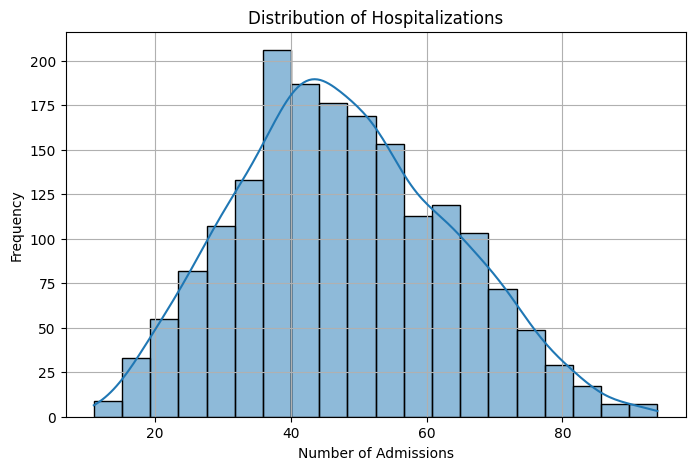

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_day_hospital_centro['NUMBER_INT'], bins=20, kde=True)
plt.title('Distribution of Hospitalizations')
plt.xlabel('Number of Admissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

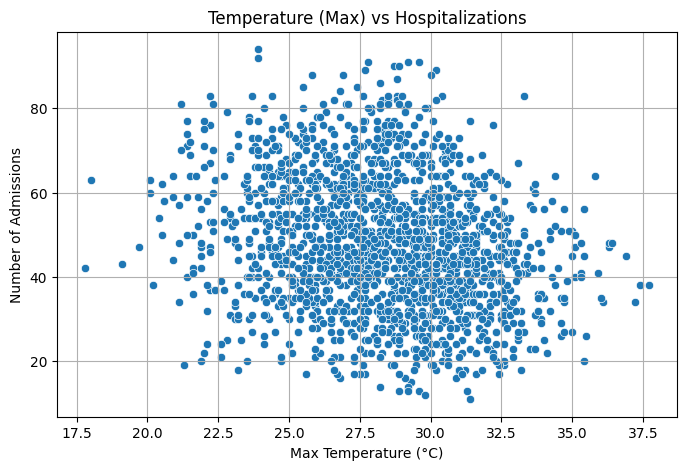

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp_max', y='NUMBER_INT', data=df_day_hospital_centro)
plt.title('Temperature (Max) vs Hospitalizations')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()


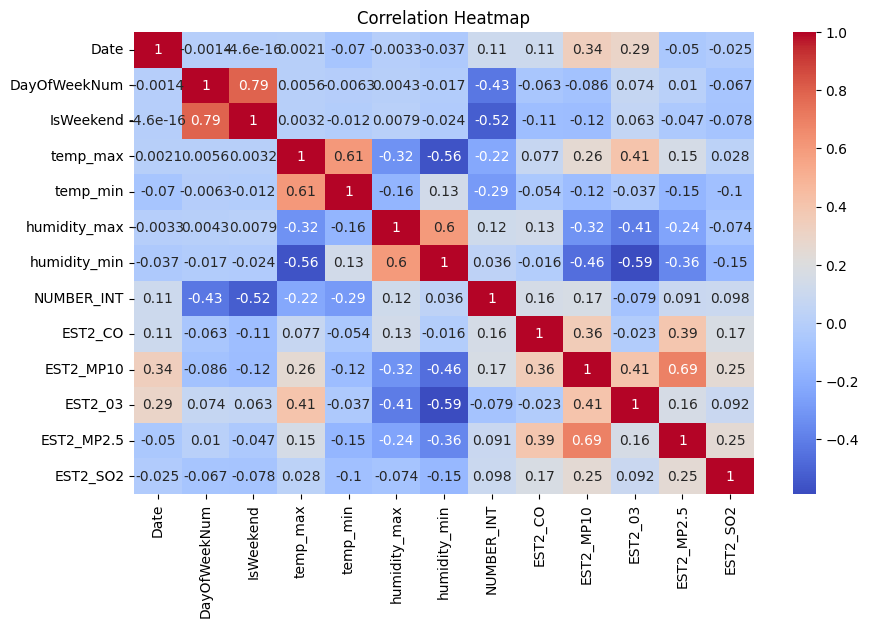

In [22]:
selected_columns = [
    'Date', 'DayOfWeekNum', 'IsWeekend', 
    'temp_max', 'temp_min', 'humidity_max', 
    'humidity_min', 'NUMBER_INT', 
    'EST2_CO', 'EST2_MP10', 'EST2_03', 'EST2_MP2.5', 'EST2_SO2'
]

df_selected_num = df_day_hospital_centro[selected_columns]

correlation_matrix = df_selected_num.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
df_selected_num.corr()['NUMBER_INT'].sort_values(ascending=False)


NUMBER_INT      1.000000
EST2_MP10       0.169005
EST2_CO         0.155408
humidity_max    0.119767
Date            0.110812
EST2_SO2        0.097677
EST2_MP2.5      0.090636
humidity_min    0.035697
EST2_03        -0.079047
temp_max       -0.223986
temp_min       -0.288701
DayOfWeekNum   -0.430371
IsWeekend      -0.522166
Name: NUMBER_INT, dtype: float64

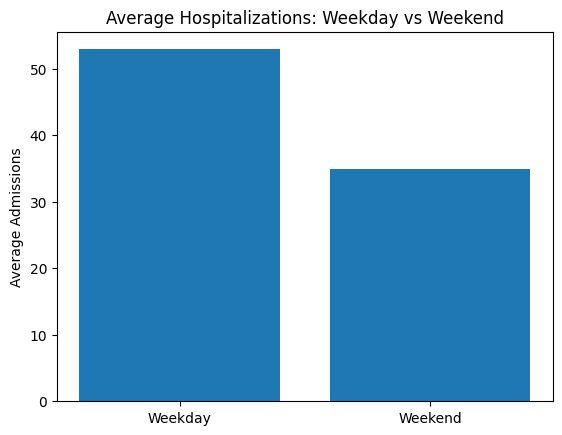

In [24]:
weekend_vs_weekday = df_day_hospital_centro.groupby('IsWeekend')['NUMBER_INT'].mean()
plt.bar(['Weekday', 'Weekend'], weekend_vs_weekday)
plt.title('Average Hospitalizations: Weekday vs Weekend')
plt.ylabel('Average Admissions')
plt.show()

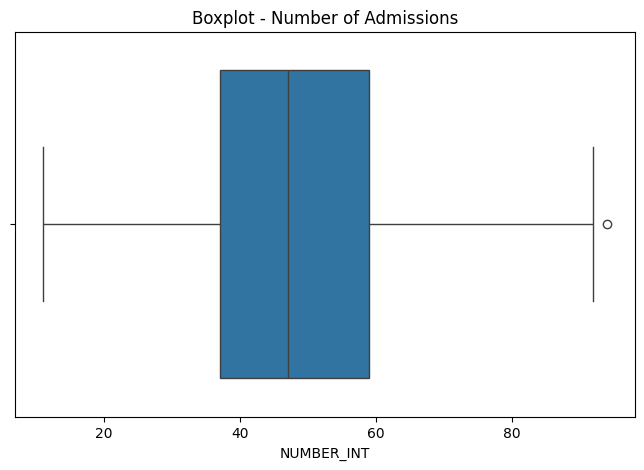

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_day_hospital_centro['NUMBER_INT'])
plt.title('Boxplot - Number of Admissions')
plt.show()

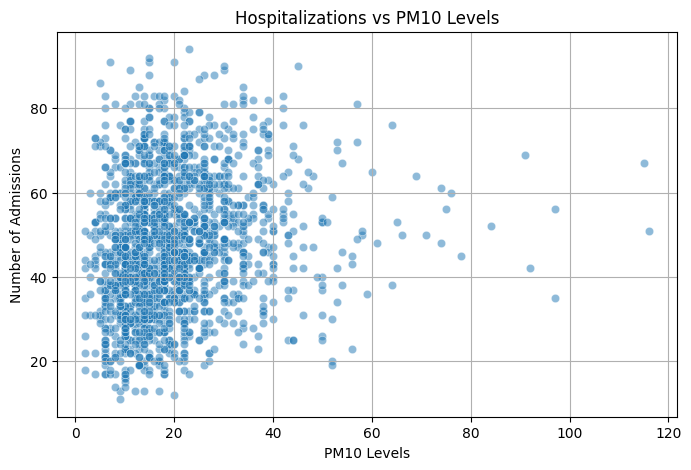

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='EST2_MP10', y='NUMBER_INT', data=df_day_hospital_centro, alpha=0.5)
plt.title('Hospitalizations vs PM10 Levels')
plt.xlabel('PM10 Levels')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

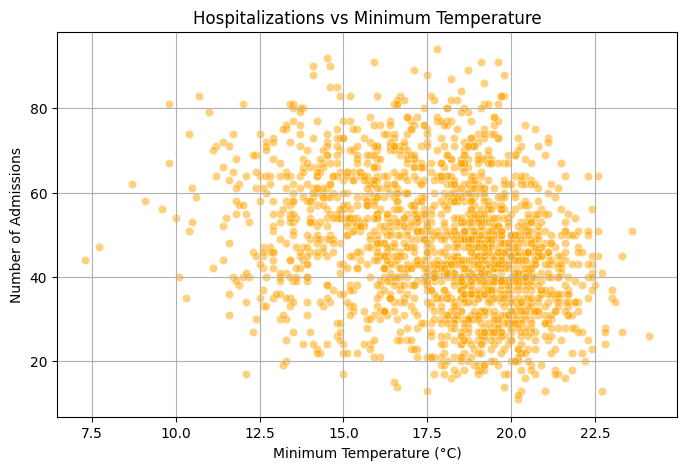

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp_min', y='NUMBER_INT', data=df_day_hospital_centro, alpha=0.5, color='orange')
plt.title('Hospitalizations vs Minimum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

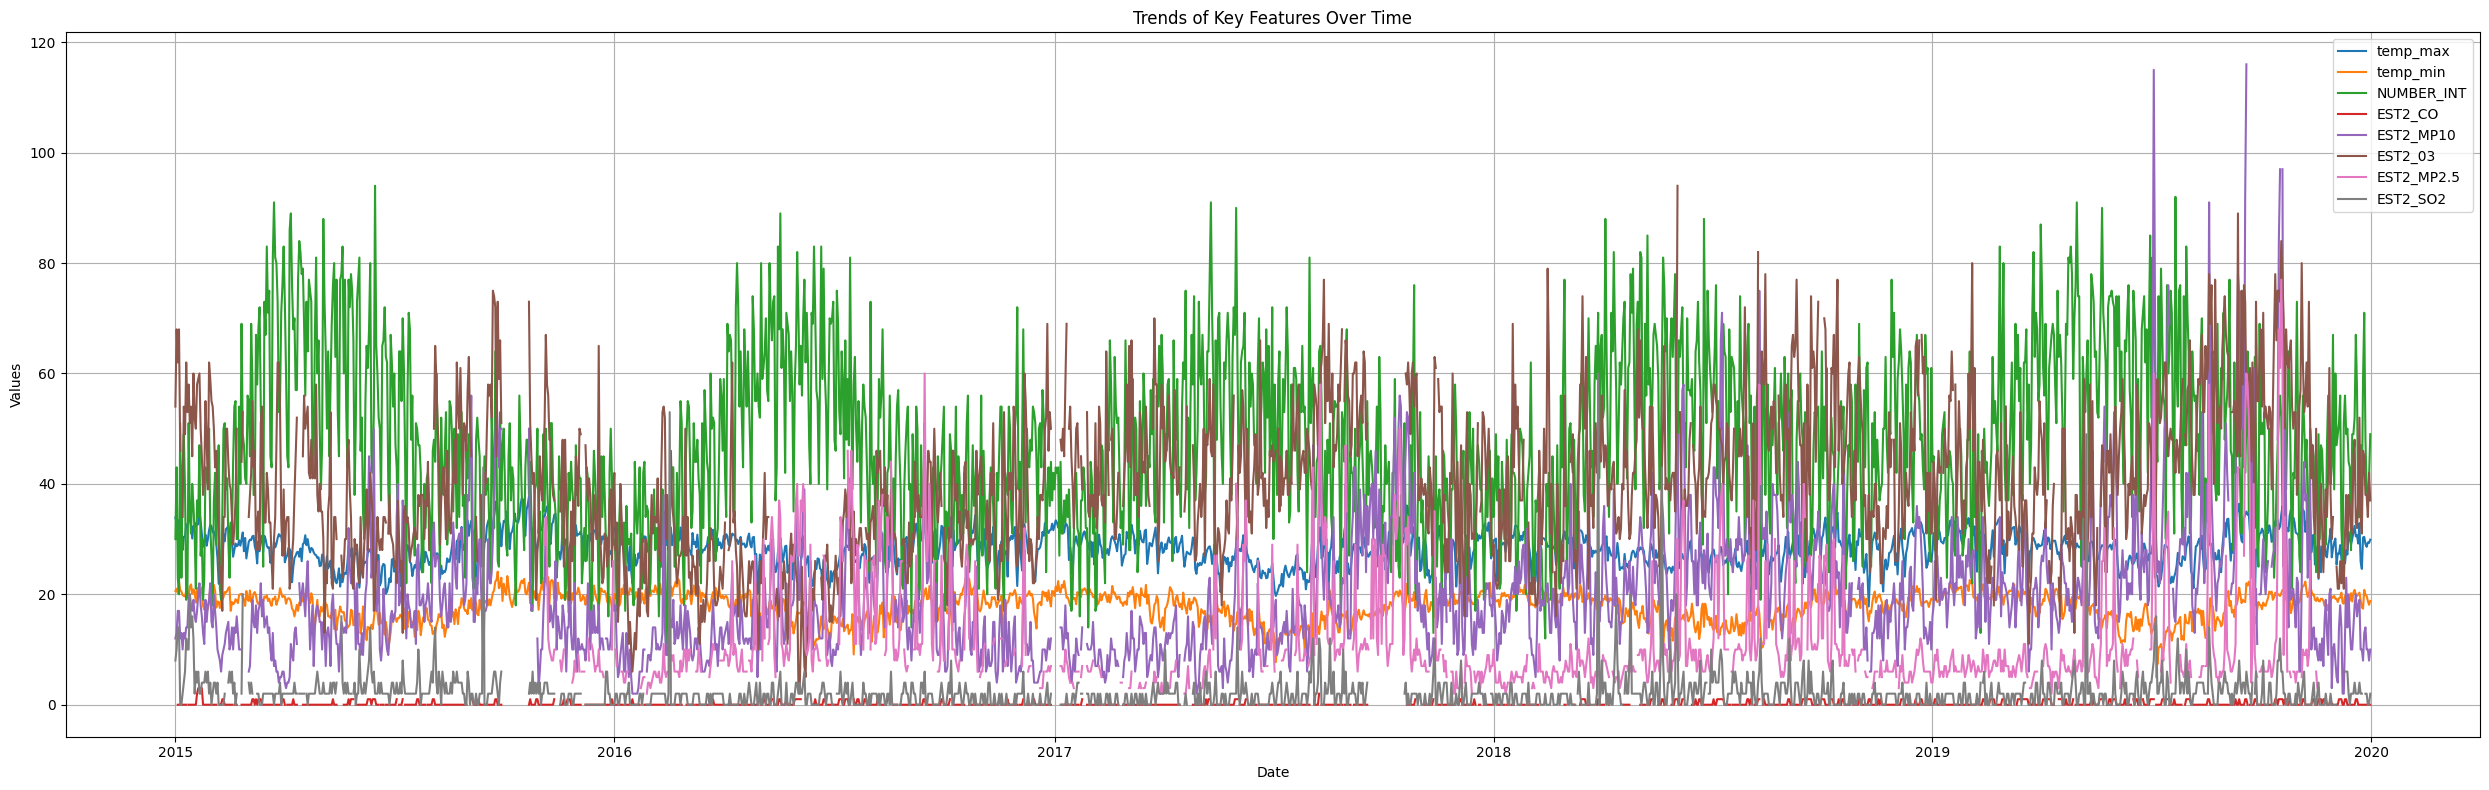

In [28]:

plt.figure(figsize=(25, 8))

df_day_hospital_centro_copy = df_day_hospital_centro.copy()

df_day_hospital_centro_copy['Date'] = pd.to_datetime(df_day_hospital_centro_copy['Date'], format='%Y%m%d')

features_plot = [
    'temp_max', 'temp_min', 'NUMBER_INT',
    'EST2_CO', 'EST2_MP10', 'EST2_03', 'EST2_MP2.5', 'EST2_SO2'
]



for feature in features_plot:
    plt.plot(df_day_hospital_centro_copy['Date'], 
             df_day_hospital_centro_copy[feature], 
             label=feature)

plt.title('Trends of Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

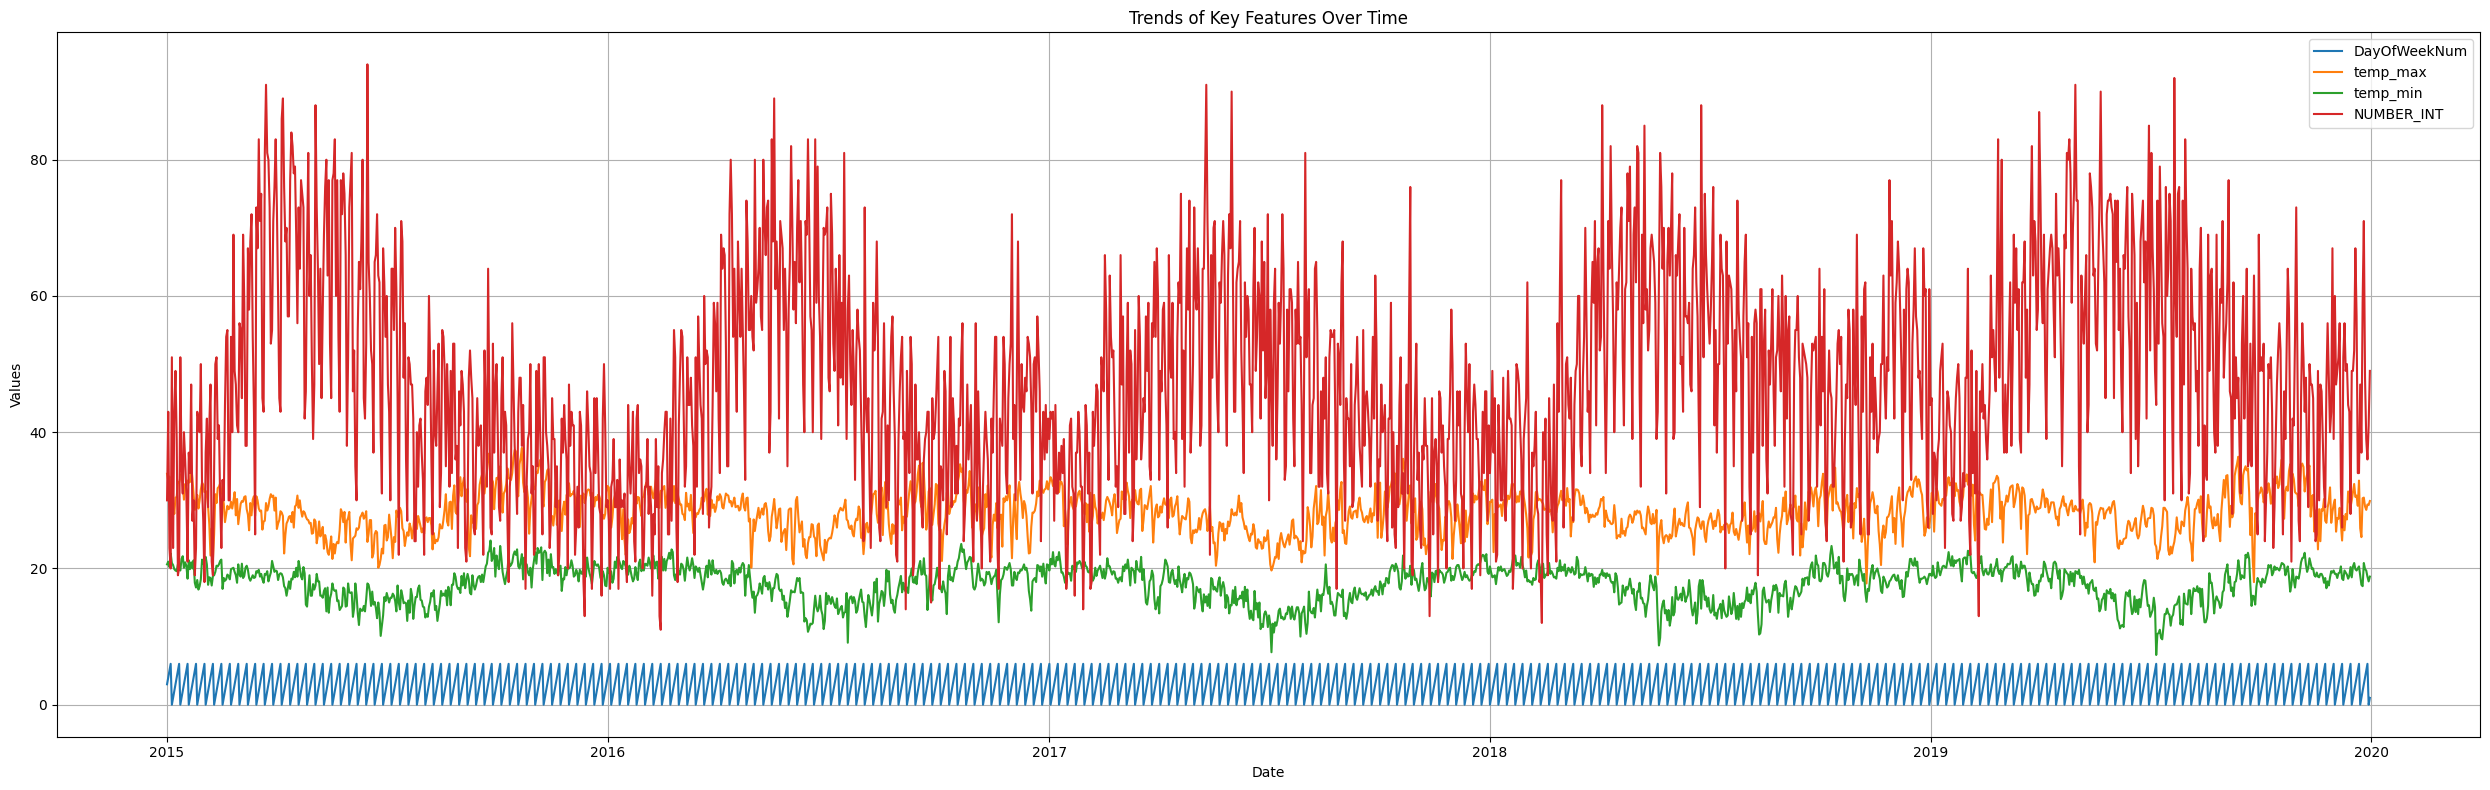

In [29]:
plt.figure(figsize=(25, 8))

features_plot_with_day = [
    'DayOfWeekNum',
    'temp_max', 
    'temp_min', 
    'NUMBER_INT'
]



for feature in features_plot_with_day:
    plt.plot(df_day_hospital_centro_copy['Date'], 
             df_day_hospital_centro_copy[feature], 
             label=feature)

plt.title('Trends of Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

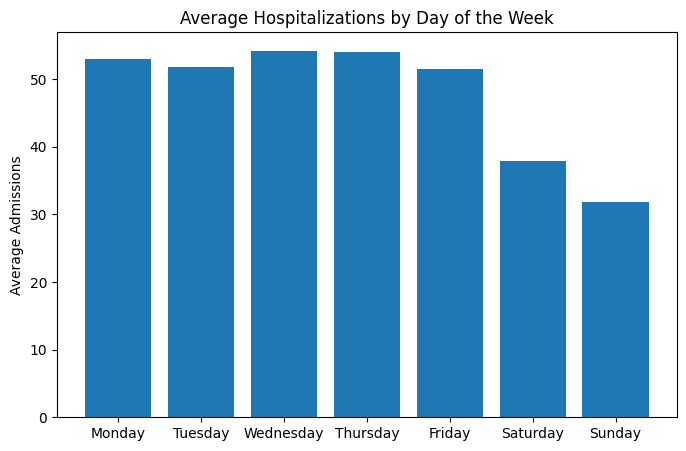

In [30]:
weekdays_avg = df_day_hospital_centro.groupby('DayOfWeekNum')['NUMBER_INT'].mean()

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 5))
plt.bar(day_labels, weekdays_avg)
plt.title('Average Hospitalizations by Day of the Week')
plt.ylabel('Average Admissions')
plt.show()